### Problem with K even

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [11]:
# take the dataset
penguin= pd.read_csv("../data/penguins.csv")
penguin.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [12]:
# take the features and the result out
x = penguin[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = penguin[['species']]

In [13]:
# split the train/test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 4)

In [14]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    # append all the distance
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #Sort the list by distance
        distance.sort()

        #Get the row index of its nearest neighbour
        neighbours = []

        for j in range(k):
            neighbours.append(distance[j][1])

        # take the labels out from y_train
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        # Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t, 0) + 1

        # Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))

        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            print('Arranging in decreasing order: ',even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    print('Value with the least distance classifies: ',y_train[j][0])
                    print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])

    return(pred)

In [16]:
n = 2
pred = knn_modified(X_train,y_train,X_test,k=n)
neighbors = list(range(1,11))
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy =  accuracy_score(y_test, pred)
    scores.append(accuracy)

scores1 = []
neighbors = list(range(1,11))
for i in neighbors:
    pred = knn_modified(X_train,y_train,X_test,k=i)
    accuracy =  accuracy_score(y_test, pred)
    scores1.append(accuracy)

Arranging in decreasing order:  ['Adelie']
Value with the least distance classifies:  Adelie
Picking classifier based on least distance:  Adelie
Arranging in decreasing order:  ['Adelie']
Value with the least distance classifies:  Adelie
Picking classifier based on least distance:  Adelie
Arranging in decreasing order:  ['Chinstrap', 'Adelie']
Value with the least distance classifies:  Chinstrap
Picking classifier based on least distance:  Chinstrap
Arranging in decreasing order:  ['Chinstrap', 'Adelie']
Value with the least distance classifies:  Chinstrap
Picking classifier based on least distance:  Chinstrap
Arranging in decreasing order:  ['Chinstrap']
Value with the least distance classifies:  Chinstrap
Picking classifier based on least distance:  Chinstrap
Arranging in decreasing order:  ['Gentoo']
Value with the least distance classifies:  Gentoo
Picking classifier based on least distance:  Gentoo
Arranging in decreasing order:  ['Chinstrap', 'Adelie']
Value with the least distan

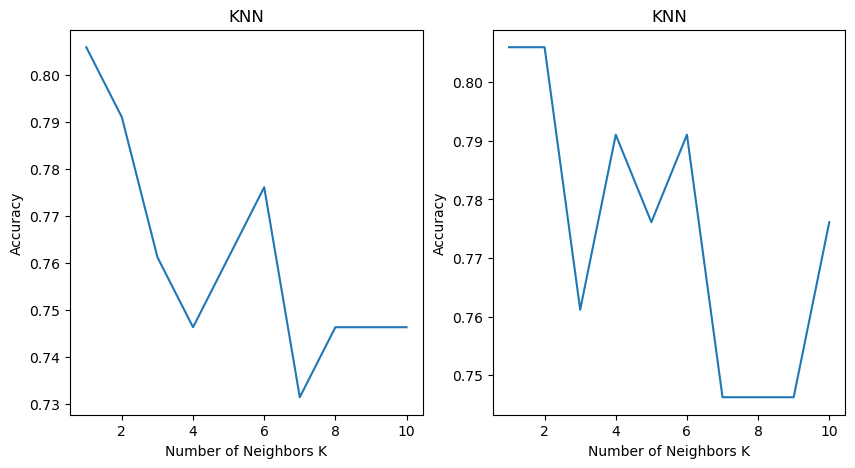

In [17]:
MSE = [ x for x in scores]
plt.figure(figsize=(10, 5))
MSE1 = [ x for x in scores1]
plt.subplot(1,2,1)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.subplot(1,2,2)
plt.plot(neighbors, MSE1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.show()